# Test using cross-correlation to measure differential travel times of high-Q gliders between nearby stations

In [82]:
# Imports
from os.path import join
from matplotlib.pyplot import subplots
from obspy.signal.cross_correlation import correlate
from pandas import Timestamp
from scipy.signal import correlate, hilbert
from numpy import linspace
from numpy.linalg import norm

from utils_basic import GEO_COMPONENTS, DELTA
from utils_preproc import read_and_process_windowed_geo_waveforms
from utils_spec import get_stream_spectrogram_stft
from utils_plot import plot_3c_waveforms_and_spectrograms, get_geo_component_color

In [83]:
# Inputs
starttime = Timestamp("2020-01-13T20:57:45Z")
dur =135.0 # seconds
station1 = "A01"
station2 = "A02"

normalize = False # Normalize the signals with the envelope or not

freqmin = 25.0
freqmax = 100.0

sampling_int = DELTA

ylim_wf = (-50.0, 50.0)
ylim_freq = (0.0, 200.0)

dbmin = -50.0
dbmax = 0.0

components = GEO_COMPONENTS

linewidth_wf = 0.5
linewidth_cc = 2

In [84]:
# Read the waveforms
stream = read_and_process_windowed_geo_waveforms(starttime, dur, stations=[station1, station2], freqmin=freqmin, freqmax=freqmax)

In [85]:
# Normalize the signals with the envelopes
if normalize:
    for trace in stream:
        signal = trace.data
        envelope = abs(hilbert(signal))
        trace.data = signal / envelope

In [86]:
# Compute the spectrograms
specdict = get_stream_spectrogram_stft(stream)

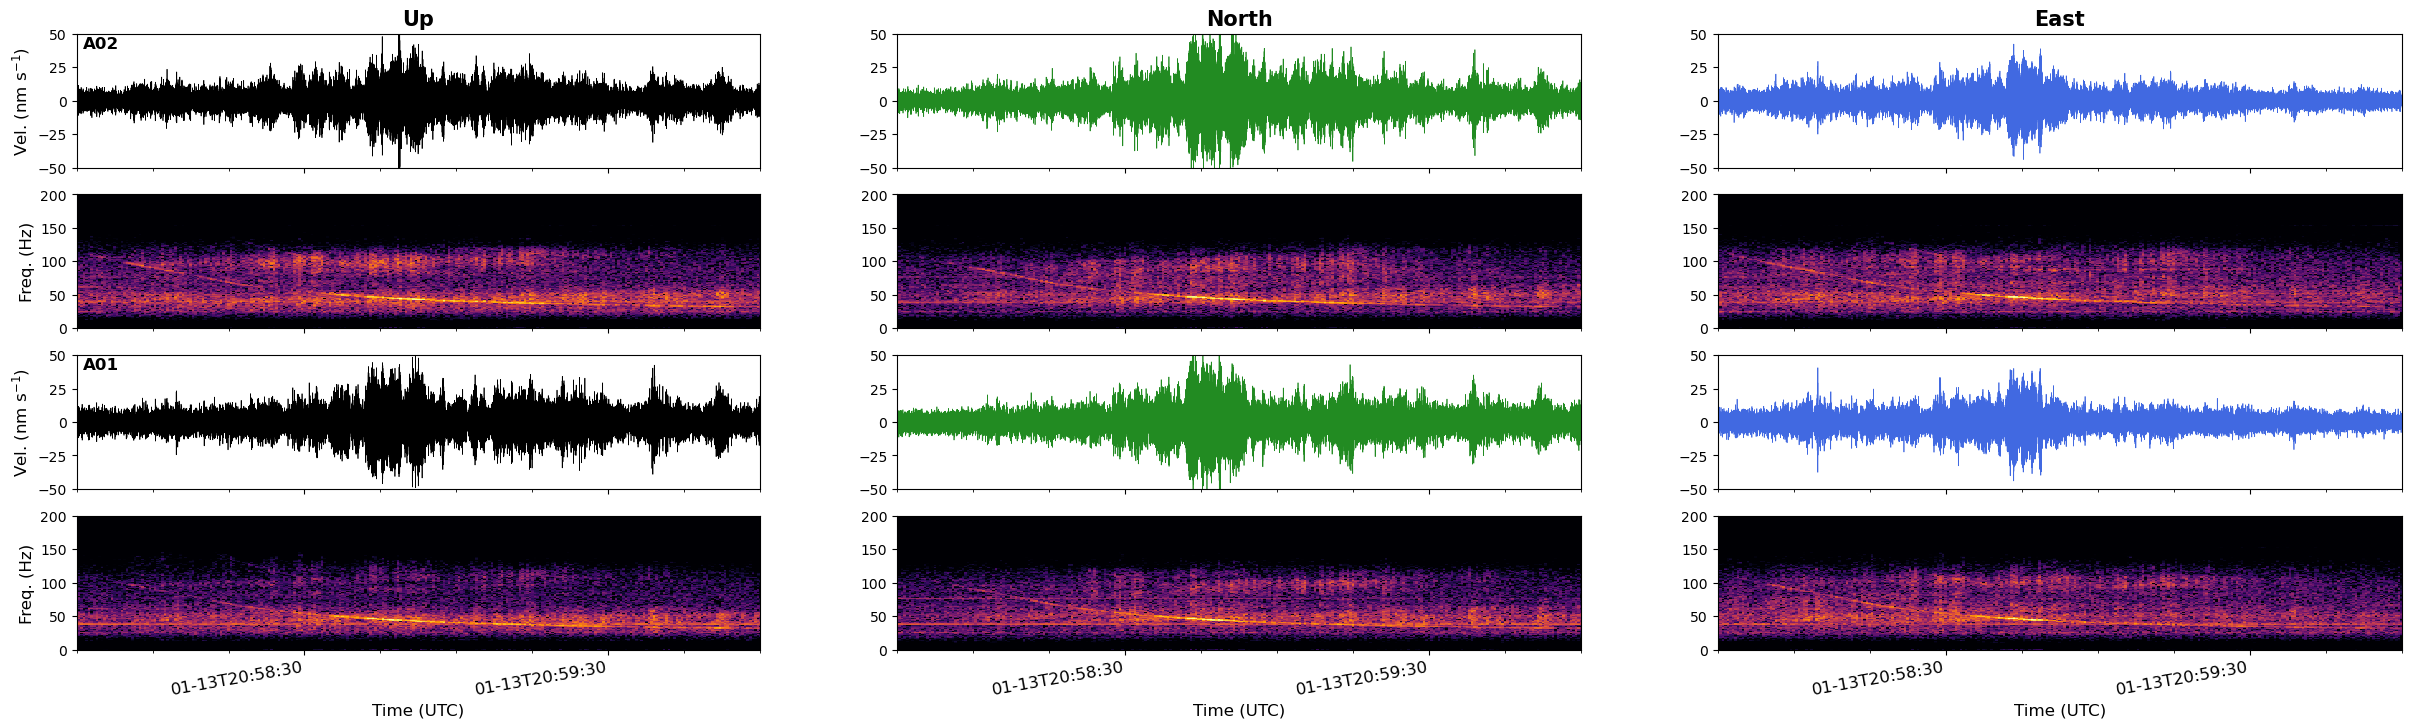

In [87]:
# Plot the waveforms and the spectrograms
fig, axes = plot_3c_waveforms_and_spectrograms(stream, specdict, dbmin=dbmin, dbmax=dbmax, linewidth=linewidth_wf)


In [88]:
# Compute CC for the 3 components
ccdict = {}
for component in components:
    signal1 = stream.select(station=station1, component=component)[0].data
    signal2 = stream.select(station=station2, component=component)[0].data
    cc = correlate(signal1, signal2, mode="full") / norm(signal1) / norm(signal2)
    ccdict[component] = cc

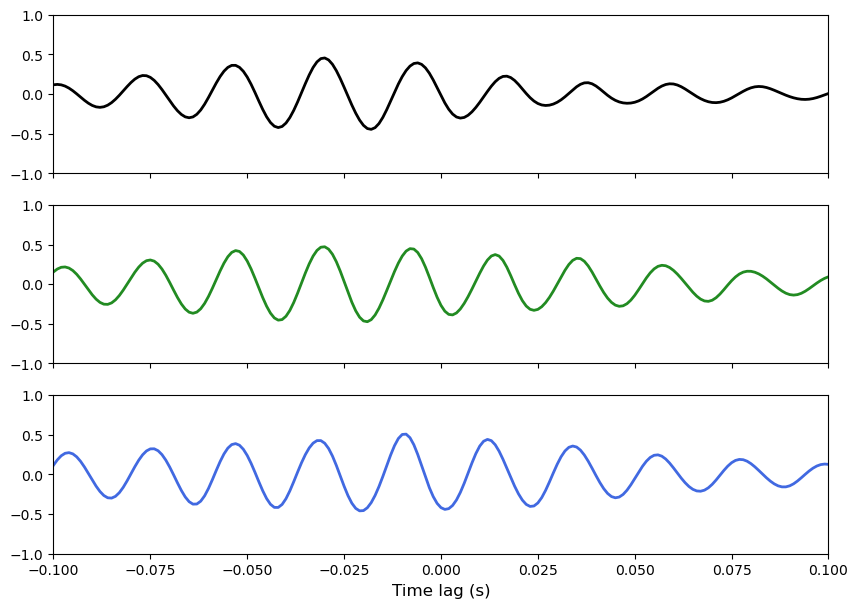

In [89]:
# Plot the CCs
fig, axes = subplots(3, 1, figsize=(10, 7), sharex=True)
for i, component in enumerate(components):
    ax = axes[i]
    cc = ccdict[component]
    numpts = len(cc)

    mintime_cc = -(numpts - 1) / 2 * sampling_int
    maxtime_cc = (numpts - 1) / 2 * sampling_int
    timeax_cc = linspace(mintime_cc, maxtime_cc, numpts)

    color = get_geo_component_color(component)
    ax.plot(timeax_cc, cc, color=color, linewidth=linewidth_cc)

    ax.set_xlim(-0.1, 0.1)
    ax.set_ylim(-1, 1)

    if i == 2:
        ax.set_xlabel("Time lag (s)", fontsize=12)

In [90]:
stream

6 Trace(s) in Stream:
7F.A01..GHZ | 2020-01-13T20:57:45.000000Z - 2020-01-13T21:00:00.000000Z | 1000.0 Hz, 135001 samples
7F.A01..GH1 | 2020-01-13T20:57:45.000000Z - 2020-01-13T21:00:00.000000Z | 1000.0 Hz, 135001 samples
7F.A01..GH2 | 2020-01-13T20:57:45.000000Z - 2020-01-13T21:00:00.000000Z | 1000.0 Hz, 135001 samples
7F.A02..GHZ | 2020-01-13T20:57:45.000000Z - 2020-01-13T21:00:00.000000Z | 1000.0 Hz, 135001 samples
7F.A02..GH1 | 2020-01-13T20:57:45.000000Z - 2020-01-13T21:00:00.000000Z | 1000.0 Hz, 135001 samples
7F.A02..GH2 | 2020-01-13T20:57:45.000000Z - 2020-01-13T21:00:00.000000Z | 1000.0 Hz, 135001 samples